In [95]:
import pandas as pd
import numpy as np
from numpy import diff

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})


#set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [96]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data.dtypes

In [97]:
# data = data[(data['MW'] >= 5.1)]

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

## Long Slab (> 70 km)

### Calculate seismic energy for each band +2/-2 years

In [98]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= -2) & (data_dgoing['LON'] <= 120) &
                         (data_dgoing['DEPTH'] > 70) & (data_dgoing['DEPTH'] < 290) &
                         (data_dgoing['MW'] >= 6 )]

In [99]:
# olive band

mega_olive = -28.536944

t1 = mega_olive - 2
t2 = mega_olive + 2

olive_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for olive band
olive_eq_Java['YEARS'] = ((olive_eq_Java['YEARS'] - mega_olive))

#calculate seismic moment released
olive_exp_sum = np.asarray(olive_eq_Java['EX'])
olive_mo_sum = np.asarray(olive_eq_Java['MO'])
olive_time_sum = np.asarray(olive_eq_Java['YEARS'])
olive_energy_sum = olive_mo_sum*np.power(10., olive_exp_sum)
olive_energy_sum_cum = np.cumsum(olive_energy_sum)

In [100]:
# green band (6.3, 1980)

mega_green = -24.394644

t1 = mega_green - 2
t2 = mega_green + 2

green_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for green band
green_eq_Java['YEARS'] = ((green_eq_Java['YEARS'] - mega_green))

#calculate seismic moment released
green_exp_sum = np.asarray(green_eq_Java['EX'])
green_mo_sum = np.asarray(green_eq_Java['MO'])
green_time_sum = np.asarray(green_eq_Java['YEARS'])
green_energy_sum = green_mo_sum*np.power(10., green_exp_sum)
green_energy_sum_cum = np.cumsum(green_energy_sum)

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [101]:
# orange band

mega_orange = -20.120661

t1 = mega_orange - 2
t2 = mega_orange + 2

orange_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for orange band
orange_eq_Java['YEARS'] = ((orange_eq_Java['YEARS'] - mega_orange))

#calculate seismic moment released
orange_exp_sum = np.asarray(orange_eq_Java['EX'])
orange_mo_sum = np.asarray(orange_eq_Java['MO'])
orange_time_sum = np.asarray(orange_eq_Java['YEARS'])
orange_energy_sum = orange_mo_sum*np.power(10., orange_exp_sum)
orange_energy_sum_cum = np.cumsum(orange_energy_sum)

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [102]:
# maroon band (Mw 6.3,  1992-06-02)

mega_maroon = -12.574554
t1 = mega_maroon - 2
t2 = mega_maroon + 2

maroon_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for maroon band
maroon_eq_Java['YEARS'] = ((maroon_eq_Java['YEARS'] - mega_maroon))

#calculate seismic moment released
maroon_exp_sum = np.asarray(maroon_eq_Java['EX'])
maroon_mo_sum = np.asarray(maroon_eq_Java['MO'])
maroon_time_sum = np.asarray(maroon_eq_Java['YEARS'])
maroon_energy_sum = maroon_mo_sum*np.power(10., maroon_exp_sum)
maroon_energy_sum_cum = np.cumsum(maroon_energy_sum)

In [103]:
# purple band (Mw 6.3, 1995-05-11)

mega_purple = -9.635957
t1 = mega_purple - 2
t2 = mega_purple + 2

purple_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for purple band
purple_eq_Java['YEARS'] = ((purple_eq_Java['YEARS'] - mega_purple))

#calculate seismic moment released
purple_exp_sum = np.asarray(purple_eq_Java['EX'])
purple_mo_sum = np.asarray(purple_eq_Java['MO'])
purple_time_sum = np.asarray(purple_eq_Java['YEARS'])
purple_energy_sum = purple_mo_sum*np.power(10., purple_exp_sum)
purple_energy_sum_cum = np.cumsum(purple_energy_sum)

In [104]:
# cyan band

mega_cyan = -6.980827
t1 = mega_cyan - 2
t2 = mega_cyan + 2

cyan_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for cyan band
cyan_eq_Java['YEARS'] = ((cyan_eq_Java['YEARS'] - mega_cyan))

#calculate seismic moment released
cyan_exp_sum = np.asarray(cyan_eq_Java['EX'])
cyan_mo_sum = np.asarray(cyan_eq_Java['MO'])
cyan_time_sum = np.asarray(cyan_eq_Java['YEARS'])
cyan_energy_sum = cyan_mo_sum*np.power(10., cyan_exp_sum)
cyan_energy_sum_cum = np.cumsum(cyan_energy_sum)

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [105]:
# red band (Mw 7.2, 2002-02-11)

mega_red = -2.874320
t1 = mega_red - 2
t2 = mega_red + 2

red_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for red band
red_eq_Java['YEARS'] = ((red_eq_Java['YEARS'] - mega_red))

#calculate seismic moment released
red_exp_sum = np.asarray(red_eq_Java['EX'])
red_mo_sum = np.asarray(red_eq_Java['MO'])
red_time_sum = np.asarray(red_eq_Java['YEARS'])
red_energy_sum = red_mo_sum*np.power(10., red_exp_sum)
red_energy_sum_cum = np.cumsum(red_energy_sum)

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [106]:
# yellow band

mega_yellow = 0
t1 = mega_yellow - 2
t2 = mega_yellow + 2

yellow_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for yellow band
yellow_eq_Java['YEARS'] = ((yellow_eq_Java['YEARS'] - mega_yellow))

#calculate seismic moment released
yellow_exp_sum = np.asarray(yellow_eq_Java['EX'])
yellow_mo_sum = np.asarray(yellow_eq_Java['MO'])
yellow_time_sum = np.asarray(yellow_eq_Java['YEARS'])
yellow_energy_sum = yellow_mo_sum*np.power(10., yellow_exp_sum)
yellow_energy_sum_cum = np.cumsum(yellow_energy_sum)

In [107]:
# grey band

mega_grey = 2.953983
t1 = mega_grey - 2
t2 = mega_grey + 2

grey_eq_Java = data_dgoing[(data_dgoing['YEARS'] > t1) & (data_dgoing['YEARS'] < t2)]

#normalize around megathrust earthquake for grey band
grey_eq_Java['YEARS'] = ((grey_eq_Java['YEARS'] - mega_grey))

#calculate seismic moment released
grey_exp_sum = np.asarray(grey_eq_Java['EX'])
grey_mo_sum = np.asarray(grey_eq_Java['MO'])
grey_time_sum = np.asarray(grey_eq_Java['YEARS'])
grey_energy_sum = grey_mo_sum*np.power(10., grey_exp_sum)
grey_energy_sum_cum = np.cumsum(grey_energy_sum)

### Years vs Mw

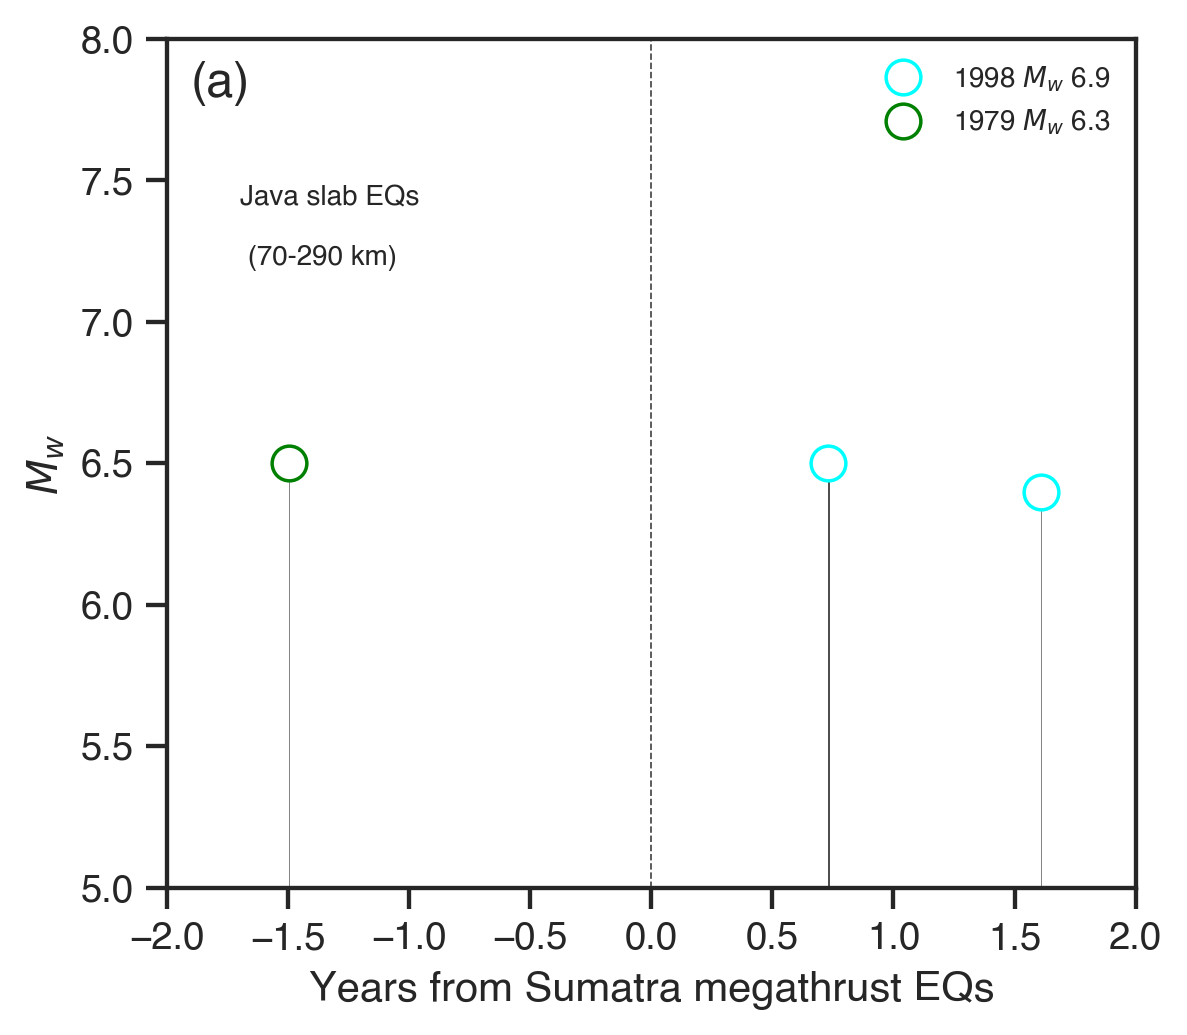

In [120]:
figsize = (5,4.5)
dpi=250
width = 0.02
lw = 2
alpha = 1
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


# fig1.bar(grey_eq_Java['YEARS'], grey_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(grey_eq_Java['YEARS'], grey_eq_Java['MW'], 'o', color='grey',
#           markersize = markersize, markerfacecolor = 'white', label= '2007 $M_w$ 8.5')

# fig1.bar(yellow_eq_Java['YEARS'], yellow_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(yellow_eq_Java['YEARS'], yellow_eq_Java['MW'], 'o', color='yellow',
#           markersize = markersize, markerfacecolor = 'white', label= '2004 $M_w$ 9.0')

# fig1.bar(red_eq_Java['YEARS'], red_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(red_eq_Java['YEARS'], red_eq_Java['MW'], 'o', color='tab:red',
#           markersize = markersize, markerfacecolor = 'white', label= '2001 $M_w$ 7.2')


fig1.bar(cyan_eq_Java['YEARS'], cyan_eq_Java['MW'], color = 'k', width = width)
fig1.plot(cyan_eq_Java['YEARS'], cyan_eq_Java['MW'], 'o', color='cyan',
          markersize = markersize, markerfacecolor = 'white', label= '1998 $M_w$ 6.9')

# fig1.bar(purple_eq_Java['YEARS'], purple_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(purple_eq_Java['YEARS'], purple_eq_Java['MW'],'o', color='purple',
#           markersize = markersize, markerfacecolor = 'white', label= '1994 $M_w$ 6.3, 6.4')

# fig1.bar(maroon_eq_Java['YEARS'], maroon_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(maroon_eq_Java['YEARS'], maroon_eq_Java['MW'], 'o', color='maroon',
#           markersize = markersize, markerfacecolor = 'white', label= '1992 $M_w$ 6.3, 6.6')

# fig1.bar(orange_eq_Java['YEARS'], orange_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(orange_eq_Java['YEARS'], orange_eq_Java['MW'], 'o', color='orange',
#           markersize = markersize, markerfacecolor = 'white', label= '1984 $M_w$ 7.1')

fig1.bar(green_eq_Java['YEARS'], green_eq_Java['MW'], color = 'k', width = width)
fig1.plot(green_eq_Java['YEARS'], green_eq_Java['MW'], 'o', color='green',
          markersize = markersize, markerfacecolor = 'white', label= '1979 $M_w$ 6.3')

# fig1.bar(olive_eq_Java['YEARS'], olive_eq_Java['MW'], color = 'k', width = width)
# fig1.plot(olive_eq_Java['YEARS'], olive_eq_Java['MW'], 'o', color='olive',
#           markersize = markersize, markerfacecolor = 'white', label= '1976 $M_w$ 7.0')

fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=0.8)

fig1.set_xlim([-2, 2])
fig1.set_ylim([5, 8])

fig1.set_xlabel('Years from Sumatra megathrust EQs')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')


fontsize = 8
fig1.legend(loc = 'upper right',
            fontsize = fontsize,
            facecolor="white",
            edgecolor="white",
            markerscale=1)

fig1.text(-1.9, 7.8, '(a)', fontsize=14)
fig1.text(-1.7, 7.2, 'Java slab EQs \n \n (70-290 km)', fontsize=fontsize)

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/70-290_Java_Mw-Years_bands.pdf"
            , dpi = 500, transparent= True, bbox_inches='tight')